## Come le reti neurali imparano.

Come per tutti i compiti di apprendimento automatico, iniziamo con un insieme di dati di addestramento. Ogni esempio nei dati di addestramento è costituito da alcune caratteristiche (gli input) e da un obiettivo atteso (l'output). Addestrare la rete significa regolare i suoi pesi in modo che possa trasformare le caratteristiche nell'obiettivo. Nel set di dati 80 Cereals, per esempio, vogliamo una rete in grado di prendere il contenuto di "zuccheri", "fibre" e "proteine" di ciascun cereale e di produrre una previsione sulle "calorie" di quel cereale. Se riusciamo ad addestrare una rete a questo scopo, i suoi pesi devono rappresentare in qualche modo la relazione tra queste caratteristiche e l'obiettivo espresso nei dati di addestramento.

Oltre ai dati di addestramento, abbiamo bisogno di altri due elementi:

- Una "funzione di perdita" che misura la bontà delle previsioni della rete.
- Un "ottimizzatore" che indichi alla rete come modificare i suoi pesi.

### Loss function
Abbiamo visto come progettare un'architettura per una rete, ma non abbiamo visto come dire a una rete quale problema risolvere. Questo è il compito della **funzione di perdita**.

La **funzione di perdita** = misura la disparità tra il valore reale dell'obiettivo e il valore previsto dal modello.

Problemi diversi richiedono funzioni di perdita diverse. Abbiamo esaminato _problemi di regressione_, in cui il compito è quello di prevedere un valore numerico: le calorie in 80 cereali, il rating nella qualità del vino rosso. Altri problemi di regressione possono essere la previsione del prezzo di una casa o dell'efficienza del carburante di un'automobile.

Una **funzione di perdita comune** per i problemi di regressione è l'errore assoluto medio o **MAE**. Per ogni previsione **y_pred**, il **MAE** misura la disparità rispetto all'obiettivo vero y_true di una differenza assoluta **abs(y_true - y_pred)**.

La perdita totale MAE su un set di dati è la media di tutte queste differenze assolute.

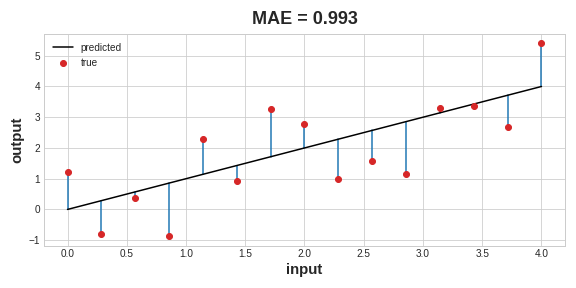

Oltre alla MAE, altre funzioni di perdita che si possono vedere per i problemi di regressione sono l'errore quadratico medio (**MSE**) o la **perdita di Huber**, entrambe disponibili in **Keras**.

Durante l'addestramento, il modello utilizzerà la funzione di perdita come guida per trovare i valori corretti dei suoi pesi (una perdita minore è migliore). In altre parole, la funzione di perdita indica alla rete il suo obiettivo.

### L'Optimizer - Stochastic Gradient Descent
Abbiamo descritto il problema che vogliamo che la rete risolva, ma ora dobbiamo dire come risolverlo. Questo è il compito dell'**optimizer**. L'**ottimizzatore** è un algoritmo che _regola i pesi per minimizzare la perdita_.

Praticamente tutti gli algoritmi di ottimizzazione utilizzati nel deep learning appartengono a una famiglia chiamata **discesa stocastica del gradiente**. Si tratta di algoritmi iterativi che addestrano una rete per gradi. Una **fase dell'addestramento** si svolge in questo modo:

1. Campionare alcuni dati di addestramento e farli passare attraverso la rete per fare delle previsioni.
2. Misurare la perdita tra le previsioni e i valori reali.
3. Regolare i pesi in modo da ridurre la perdita.

Poi si ripete l'operazione finché la perdita non si riduce al massimo (o finché non diminuisce ulteriormente).

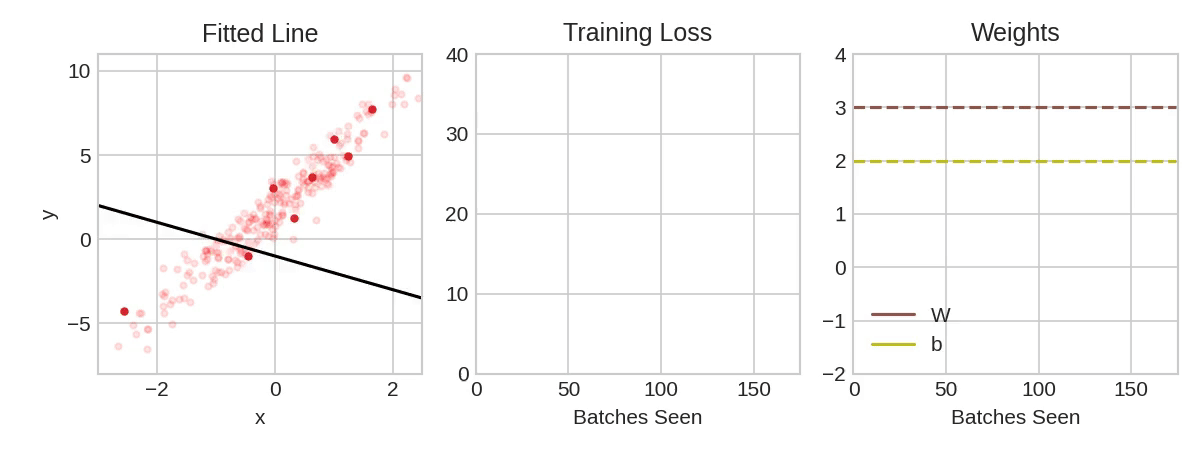
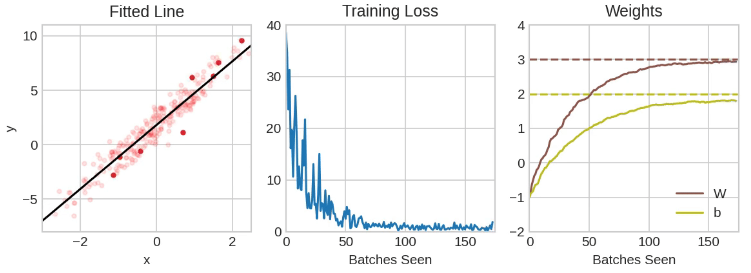

Il campione di dati di addestramento di ogni iterazione è chiamato **minibatch** (o spesso solo "**batch**"), mentre un ciclo completo di dati di addestramento è chiamato **epoch**. Il numero di epoche di addestramento è il numero di volte in cui la rete vedrà ogni esempio di addestramento.

L'animazione mostra il modello lineare della Lezione 1 in fase di addestramento con SGD. I punti rossi chiari rappresentano l'intero set di addestramento, mentre i punti rossi pieni sono i minibatch. Ogni volta che SGD vede un nuovo minibatch, sposta i pesi (**w** la pendenza e **b** l'intercetta) verso i valori corretti di quel batch. Lotto dopo lotto, la linea alla fine converge verso il suo miglior adattamento. Si può notare che la perdita si riduce man mano che i pesi si avvicinano ai valori reali.

### Tasso di apprendimento e Batch size
Si noti che la linea si sposta solo di poco nella direzione di ogni batch (invece di spostarsi completamente). La dimensione di questi spostamenti è determinata dal **learingn rate**. Un tasso di apprendimento più basso significa che la rete deve vedere più minibatch prima che i suoi pesi convergano verso i valori migliori.

Il tasso di apprendimento e la dimensione dei minibatch sono i due parametri che hanno il maggiore effetto sul modo in cui procede l'addestramento SGD. La loro interazione è spesso sottile e la scelta giusta per questi parametri non è sempre ovvia. (Esploreremo questi effetti nell'esercizio).

Fortunatamente, per la maggior parte del lavoro non sarà necessario effettuare un'ampia ricerca di iperparametri per ottenere risultati soddisfacenti. **Adam** è un algoritmo SGD con un tasso di apprendimento adattivo che lo rende adatto alla maggior parte dei problemi senza alcuna regolazione dei parametri (in un certo senso è "autoregolante"). Adam è un ottimo ottimizzatore generale.

### Aggiunta della perdita e dell'ottimizzatore
Dopo aver definito un modello, è possibile aggiungere una funzione di perdita e un ottimizzatore con il metodo di compilazione del modello:

Si noti che siamo in grado di specificare la perdita e l'ottimizzatore con una semplice stringa. È anche possibile accedere a questi parametri direttamente tramite l'**API di Keras**, ad esempio se si volessero regolare i parametri, ma per noi i valori predefiniti andranno bene.

Il **gradiente** è un vettore che ci dice in che direzione devono andare i pesi. Più precisamente, ci dice come modificare i pesi per far sì che la perdita cambi più velocemente. Chiamiamo il nostro processo "**discesa del gradiente**" perché utilizza il gradiente per far scendere la curva delle perdite verso un minimo. Stocastico significa "determinato dal caso". Il nostro addestramento è stocastico perché i minibatch sono campioni casuali del set di dati. Ecco perché si chiama SGD.

### Esempio
Ora sappiamo tutto ciò che ci serve per iniziare ad addestrare i modelli di deep learning. Utilizzeremo il dataset Red Wine Quality.

Questo set di dati consiste in misurazioni fisiochimiche di circa 1600 vini rossi portoghesi. Per ogni vino è inclusa anche una valutazione della qualità ottenuta da test di degustazione alla cieca. Quanto possiamo prevedere la qualità percepita di un vino da queste misurazioni?

Abbiamo inserito tutta la preparazione dei dati nella prossima cella nascosta. Non è essenziale per ciò che segue, quindi potete tranquillamente saltarla. Una cosa che si può notare per ora è che abbiamo riscalato ogni caratteristica in modo che sia compresa nell'intervallo [0,1]. Le reti neurali tendono a funzionare meglio quando i loro input sono su una scala comune.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Quanti input deve avere questa rete? Lo si può scoprire osservando il numero di colonne della matrice dei dati. Assicuratevi di non includere l'obiettivo ("qualità"), ma solo le caratteristiche di input.

In [2]:
print(X_train.shape)

(1119, 11)


Undici colonne significano undici ingressi.

Abbiamo scelto una rete a tre strati con oltre 1500 neuroni. Questa rete dovrebbe essere in grado di apprendere relazioni piuttosto complesse nei dati.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

La decisione sull'architettura del modello dovrebbe essere parte di un processo. Iniziate in modo semplice e utilizzate la perdita di convalida come guida. Lo sviluppo del modello verrà approfondito negli esercizi.

Dopo aver definito il modello, compiliamo l'ottimizzatore e la funzione di perdita.

In [4]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Ora siamo pronti a iniziare l'addestramento! Abbiamo detto a **Keras** di dare in pasto all'ottimizzatore 256 righe di dati di addestramento alla volta (**batch_size**) e di farlo 10 volte per tutto il dataset (**epochs**).

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 26ms/step - loss: 0.2850 - val_loss: 0.1360
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1459 - val_loss: 0.1366
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1285 - val_loss: 0.1270
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1226 - val_loss: 0.1245
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1160 - val_loss: 0.1095
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.1086 - val_loss: 0.1082
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1082 - val_loss: 0.1049
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1055 - val_loss: 0.1027
Epoch 9/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1033 - val_loss: 0.1017
Epoch 10/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1033 - val_loss: 0.1030


Si può notare che **Keras** si aggiorna sulla perdita mentre il modello si allena. 

Spesso, però, un modo migliore per visualizzare la perdita è _tracciarla_. Il metodo fit, infatti, conserva una registrazione della perdita prodotta durante l'addestramento in un oggetto **History**. Convertiremo i dati in un dataframe Pandas, in modo da semplificare la rappresentazione grafica.

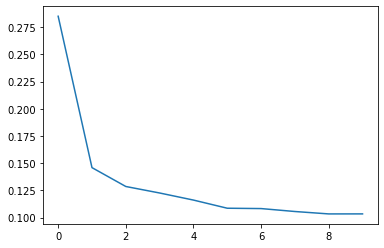

In [6]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

Notate come la perdita si stabilizzi con il passare delle epoche. Quando la curva delle perdite diventa così orizzontale, significa che il modello ha imparato tutto quello che poteva e non c'è motivo di continuare con altre epoche.

### Esercizi

In questo esercizio si addestrerà una rete neurale sul dataset Fuel Economy e si esplorerà l'effetto del tasso di apprendimento e della dimensione del batch sull'SGD.

In [7]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex3 import *

Nel dataset Fuel Economy il compito è quello di prevedere il risparmio di carburante di un'automobile in base a caratteristiche come il tipo di motore o l'anno di produzione.

Per prima cosa caricare il dataset eseguendo la cella sottostante.

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


Se volete, date un'occhiata ai dati. In questo caso, il nostro obiettivo è la colonna "**FE**" e le altre colonne sono le caratteristiche.

In [10]:
# Uncomment to see original data
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [11]:
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Eseguire la cella successiva per definire la rete da utilizzare per questo compito.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

### Add e Loss Optimizer
Prima di addestrare la rete, è necessario **definire la perdita** e **l'ottimizzatore** da utilizzare. Utilizzando il metodo di compilazione del modello, aggiungiamo **l'ottimizzatore Adam** e la **perdita MAE**.

In [15]:
# YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='mae'
)

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Train del Modello
Una volta definito il modello e compilato con una perdita e un ottimizzatore, si è pronti per l'allenamento. Allenare la rete per 200 epoch con una dimensione di batch di 128. I dati di input sono **X** con obiettivo **y**.

In [16]:
# YOUR CODE HERE
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

# Check your answer
q_2.check()

Epoch 1/200
9/9 [==============================] - 0s 1ms/step - loss: 2.9544
Epoch 2/200
9/9 [==============================] - 0s 997us/step - loss: 1.1567
Epoch 3/200
9/9 [==============================] - 0s 997us/step - loss: 0.6239
Epoch 4/200
9/9 [==============================] - 0s 997us/step - loss: 0.3599
Epoch 5/200
9/9 [==============================] - 0s 872us/step - loss: 0.2529
Epoch 6/200
9/9 [==============================] - 0s 997us/step - loss: 0.1931
Epoch 7/200
9/9 [==============================] - 0s 997us/step - loss: 0.1524
Epoch 8/200
9/9 [==============================] - 0s 997us/step - loss: 0.1288
Epoch 9/200
9/9 [==============================] - 0s 872us/step - loss: 0.1083
Epoch 10/200
9/9 [==============================] - 0s 997us/step - loss: 0.0989
Epoch 11/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0881
Epoch 12/200
9/9 [==============================] - 0s 997us/step - loss: 0.0812
Epoch 13/200
9/9 [=======================

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

L'ultimo passo consiste nell'esaminare le curve di perdita e valutare l'addestramento. Eseguire la cella sottostante per ottenere un grafico della perdita di addestramento.

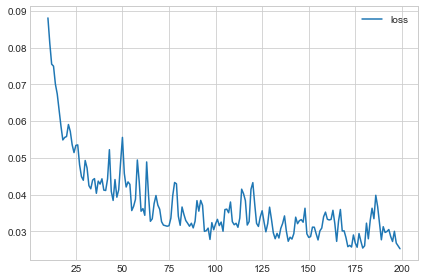

In [23]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[10:, ['loss']].plot();

### Evaluate training
Se si addestra il modello più a lungo, ci si aspetta che la perdita diminuisca ulteriormente?

In [27]:
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

This depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs.  Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous.

Dipende dall'evoluzione della perdita durante l'addestramento: se le curve di apprendimento si sono stabilizzate, di solito non ci sarà alcun vantaggio nell'addestramento per ulteriori epoche. Al contrario, se la perdita sembra essere ancora in diminuzione, l'addestramento più lungo potrebbe essere vantaggioso.

Con il tasso di apprendimento e la dimensione del batch si ha un certo controllo:

- Quanto tempo ci vuole per addestrare un modello
- Quanto sono rumorose le curve di apprendimento
- Quanto diventa piccola la perdita

Per comprendere meglio questi due parametri, esaminiamo il modello lineare, la nostra rete neurale **ppsimplest**. Avendo un solo peso e un bias, è più facile vedere l'effetto di un cambiamento di parametro.

La prossima cella genererà un'animazione come quella del tutorial. Modificare i valori di **learning_rate**, **batch_size** e **num_examples** (quanti punti dati) e poi eseguire la cella. Provate le seguenti combinazioni o provatene di vostre:
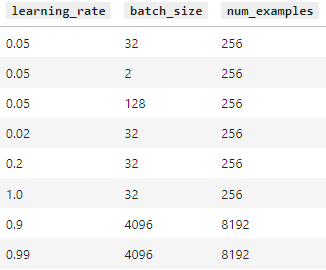

In [25]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

### Tasso d'apprendimento e Batch Size
Che effetto ha avuto la modifica di questi parametri? Dopo averci pensato, eseguite la cella sottostante per discuterne.

In [26]:
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small *sample* of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)
